In [11]:
%load_ext autoreload
%autoreload 2


from util import *
from myalgorithm import algorithm



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:

problem_file = 'STAGE1_1.json'
timelimit = 300

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

Best obj = 7322.13
Best obj = 7262.32
Best obj = 7249.86
Best obj = 7242.7
Best obj = 7189.47
Best obj = 7131.72
Best obj = 7071.64
Best obj = 7017.95
Best obj = 6986.19
Best obj = 6946.34
Best obj = 6907.7
Best obj = 6847.66
Best obj = 6803.91
Best obj = 6754.91
Best obj = 6711.53
Best obj = 6658.11
Best obj = 6609.89
Best obj = 6600.44
Best obj = 6552.71
Best obj = 6520.95
Best obj = 6469.75
Best obj = 6422.13
Best obj = 6389.97
Best obj = 6349.91
Best obj = 6322.93
Best obj = 6290.99
Best obj = 6266.09
Best obj = 6216.51
Best obj = 6193.33
Best obj = 6162.89
Best obj = 6110.99
Best obj = 6063.99
Best obj = 6021.14
Best obj = 6006.5
Best obj = 6003.15
Best obj = 5973.81
Best obj = 5945.69
Best obj = 5904.93
Best obj = 5815.85
Best obj = 5760.731000000001
Best obj = 5669.2029999999995
Best obj = 5607.946999999999
Best obj = 5548.95
Best obj = 5465.808000000001
Best obj = 5405.692000000001
Best obj = 5350.186000000001
Best obj = 5325.102000000001
Best obj = 5256.696999999999
Best obj =

{'total_cost': 510065.1,
 'avg_cost': 5100.651,
 'num_drivers': 47,
 'total_dist': 230403,
 'feasible': True,
 'infeasibility': None,
 'bundles': [['WALK', [1], [1]],
  ['WALK', [3], [3]],
  ['WALK', [7], [7]],
  ['WALK', [83], [83]],
  ['WALK', [89], [89]],
  ['WALK', [99], [99]],
  ['BIKE', [16, 64], [16, 64]],
  ['BIKE', [11, 47], [11, 47]],
  ['BIKE', [85, 79], [85, 79]],
  ['BIKE', [38, 62], [38, 62]],
  ['BIKE', [25, 52], [25, 52]],
  ['CAR', [44, 51], [44, 51]],
  ['CAR', [74, 76], [74, 76]],
  ['CAR', [8, 18], [8, 18]],
  ['CAR', [42, 31], [31, 42]],
  ['CAR', [72, 90, 88], [72, 90, 88]],
  ['CAR', [34, 63], [34, 63]],
  ['CAR', [65, 60], [65, 60]],
  ['CAR', [69, 73], [69, 73]],
  ['CAR', [41, 61], [41, 61]],
  ['CAR', [86, 77], [77, 86]],
  ['CAR', [14, 45], [14, 45]],
  ['CAR', [17, 43], [17, 43]],
  ['CAR', [5, 26], [26, 5]],
  ['CAR', [75, 98], [75, 98]],
  ['CAR', [49, 58], [58, 49]],
  ['CAR', [46, 10], [10, 46]],
  ['CAR', [2, 39], [2, 39]],
  ['CAR', [84, 78], [84, 78]

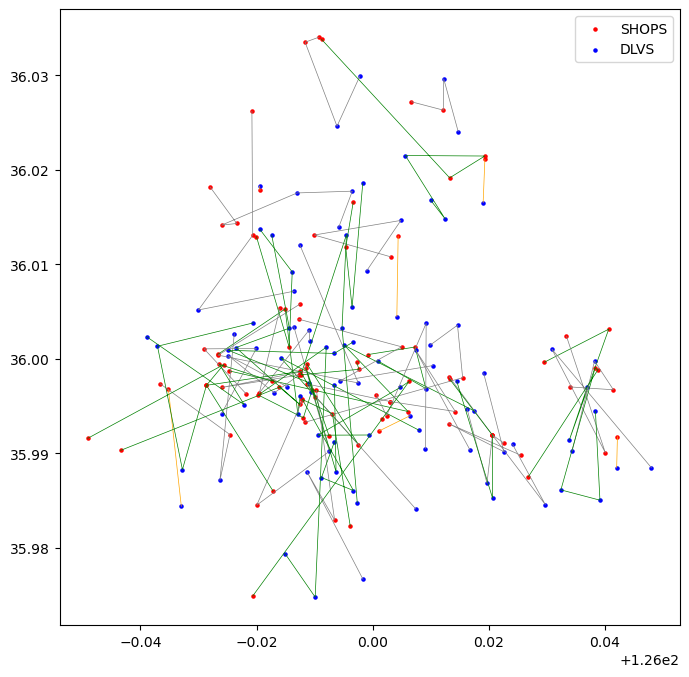

In [13]:
draw_route_solution(ALL_ORDERS, checked_solution)

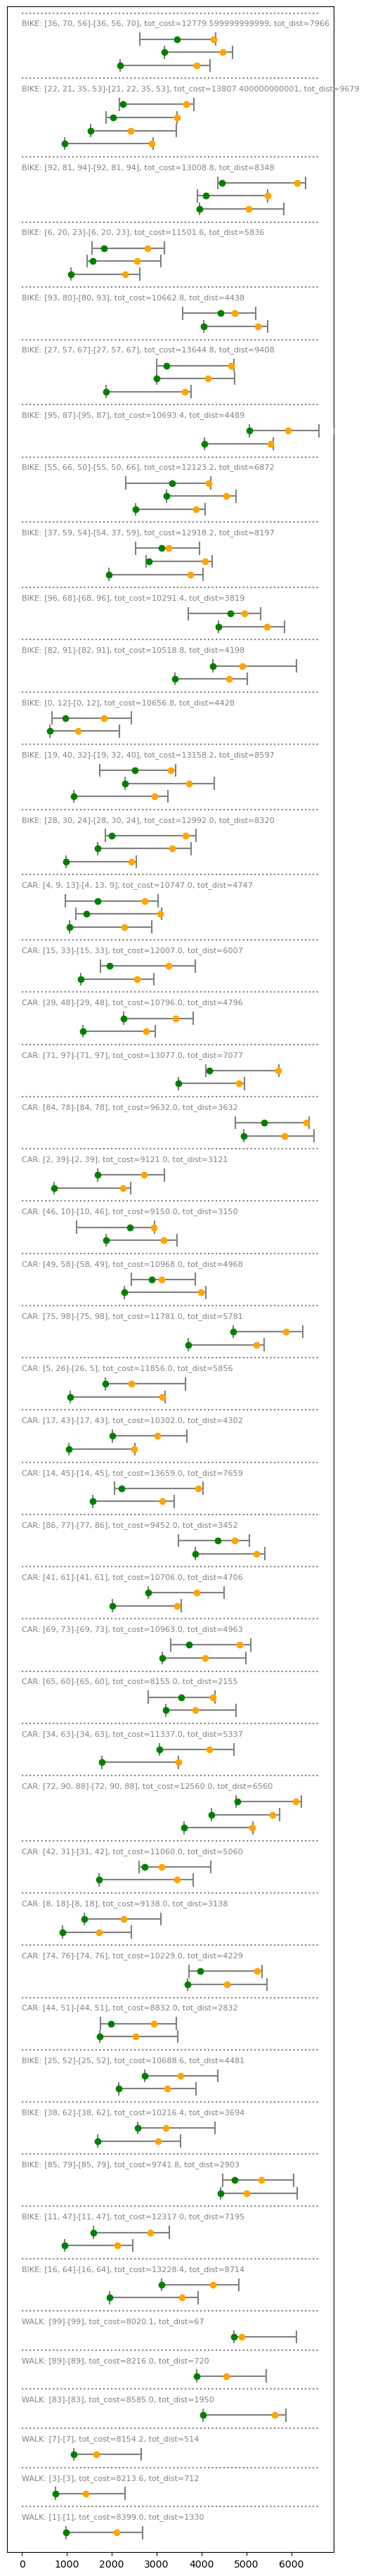

In [14]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)